PLA6619 Introduction to Urban Data and Informatics I \
Tuesday, September 29, 2020 \
Week04

# Lab 03

Please submit __Lab02.ipynb with outputs__ on Canvas after this lab session. It doesn't need to be perfect, but your submission will be reflected in attendance and participation. The solution of this notebook will be shared by end of today.

1. More data manipultation practices with Pandas
2. Exploratory data analysis and basic data viz using Matplotlib

## Resource: 
* Python Data Science Handbook: Essential Tools for Working with Data by Jake VanderPlas (https://jakevdp.github.io/PythonDataScienceHandbook/). 
* Matplotlib resources (https://matplotlib.org/)
* Python colors (https://matplotlib.org/gallery/color/named_colors.html)

# Load required packages

In [1]:
# To ignore unimporant system warnings
import warnings
warnings.filterwarnings("ignore")

# We will use Pandas, Numpy, and Matplotlib which is a package for visualization with Python
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# A magic functin that renders the figure in a notebook 
%matplotlib inline 

# PART 1. Data preparation

# 1. Load Datasets

* 'nyc_covid_updated_09272020.csv', NYC COVID-19 data at zipcode level, updated September 27th 2020 (https://github.com/nychealth/coronavirus-data/blob/master/data-by-modzcta.csv)
* 'nyc_var.csv', NYC zipcode level median income and average household size. The original data source is ACS. 
* FYI, the second data has a duplicate data issue.

In [2]:
# Load covid-19 data
# If you already know the column information of the dataset, you can specify data type while loading, by using dtype
df_covid = pd.read_csv('../data/nyc_covid_upated_09272020.csv', dtype={'Zipcode':str})
df_covid.head(2)

,Zipcode,NEIGHBORHOOD_NAME,BOROUGH_GROUP,COVID_CASE_COUNT,COVID_CASE_RATE,POP_DENOMINATOR,COVID_DEATH_COUNT,COVID_DEATH_RATE,PERCENT_POSITIVE,TOTAL_COVID_TESTS
0,10001,Chelsea/NoMad/West Chelsea,Manhattan,459,1947.97,23563.03,27,114.59,5.47,8395
1,10002,Chinatown/Lower East Side,Manhattan,1372,1787.50,76755.41,161,209.76,6.55,20933


In [16]:
# Load neighborhood variable data
df_var = pd.read_csv('../data/nyc_var.csv', dtype={'Zipcode':str})
df_var.head(2)

,Zipcode,med_income,avg_hh_size
0,10001,88526.0,2.225
1,10002,35859.0,2.180


# 2. Check duplicate data
* There should not be repeated zipcodes in 'Zipcode' column.
* Syntax:
    
       DATAFRAME_NAME.dupliated() --> this returns boolean series with true value for each duplicated row
       DATAFRAME_NAME.dupliated().sum() --> this returns total number of duplicated rows

In [17]:
print(df_covid.duplicated())
print(df_covid.duplicated().sum())

print(df_var.duplicated())
print(df_var.duplicated().sum())

0      False
1      False
2      False
3      False
4      False
       ...  
172    False
173    False
174    False
175    False
176    False
Length: 177, dtype: bool
0
0      False
1      False
2      False
3      False
4      False
       ...  
179     True
180     True
181     True
182     True
183     True
Length: 184, dtype: bool
7


# 3. Remove duplicated rows
* Syntax:

        DATAFRAME_NAME.drop_duplicates()

In [18]:
print(len(df_var))
df_var = df_var.drop_duplicates()
print(len(df_var))

184
177


# 4. Join two datasets
![title](https://pandas.pydata.org/pandas-docs/stable/_images/merging_merge_on_key.png)
* We would like to join two tables (df_covid and df_var) based on 'Zipcode' column
* If you want to learn more about mege, join, or concatenate functions of Pandas, here is a useful link (https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html) 

In [21]:
df = pd.merge(df_covid, df_var, on = 'Zipcode', how='left')
df.head()

,Zipcode,NEIGHBORHOOD_NAME,BOROUGH_GROUP,COVID_CASE_COUNT,COVID_CASE_RATE,POP_DENOMINATOR,COVID_DEATH_COUNT,COVID_DEATH_RATE,PERCENT_POSITIVE,TOTAL_COVID_TESTS,med_income,avg_hh_size
0,10001,Chelsea/NoMad/West Chelsea,Manhattan,459,1947.97,23563.03,27,114.59,5.47,8395,88526.0,2.225
1,10002,Chinatown/Lower East Side,Manhattan,1372,1787.50,76755.41,161,209.76,6.55,20933,35859.0,2.180
2,10003,East Village/Gramercy/Greenwich Village,Manhattan,589,1094.76,53801.62,35,65.05,3.06,19267,112131.0,1.700
3,10004,Financial District,Manhattan,45,1232.67,3650.61,1,27.39,4.28,1051,157645.0,1.820
4,10005,Financial District,Manhattan,110,1310.13,8396.11,2,23.82,4.21,2611,173333.0,2.020


# PART 2. Exploratory Data Analysis
# 1. Descriptive Statistics

In [22]:
df.describe().round()

,COVID_CASE_COUNT,COVID_CASE_RATE,POP_DENOMINATOR,COVID_DEATH_COUNT,COVID_DEATH_RATE,PERCENT_POSITIVE,TOTAL_COVID_TESTS,med_income,avg_hh_size
count,177.0,177.0,177.0,177.0,177.0,177.0,177.0,177.0,177.0
mean,1309.0,2666.0,47426.0,108.0,214.0,10.0,13206.0,73905.0,3.0
std,921.0,934.0,26411.0,86.0,114.0,4.0,7298.0,36878.0,1.0
min,45.0,686.0,3458.0,0.0,0.0,3.0,1033.0,21149.0,2.0
25%,616.0,1952.0,26614.0,42.0,142.0,7.0,7627.0,50832.0,2.0
50%,1001.0,2724.0,43030.0,86.0,206.0,10.0,11759.0,66483.0,3.0
75%,1848.0,3341.0,67089.0,154.0,266.0,13.0,18769.0,88526.0,3.0
max,5168.0,4846.0,111594.0,447.0,717.0,16.0,35286.0,250001.0,4.0


# 2. Histogram

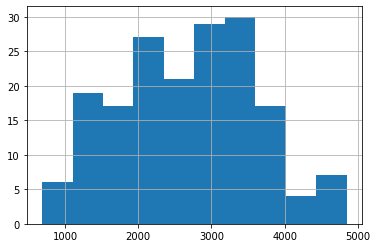

In [23]:
fig = plt.figure(figsize = (6,4))
df['COVID_CASE_RATE'].hist()

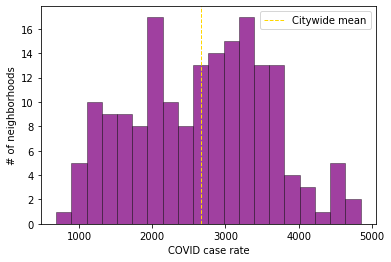

In [28]:
fig = plt.figure(figsize = (6,4))
df['COVID_CASE_RATE'].hist(bins = 20, color = 'Purple', edgecolor = 'k', linewidth = 0.5, alpha = 0.75)
plt.grid(b = False)
plt.axvline(df['COVID_CASE_RATE'].mean(), color = 'Gold', linewidth = 1, linestyle = '--', label = 'Citywide mean')
plt.xlabel('COVID case rate')
plt.ylabel('# of neighborhoods')
plt.legend()

# 3. Plotting multiple plots at the same time

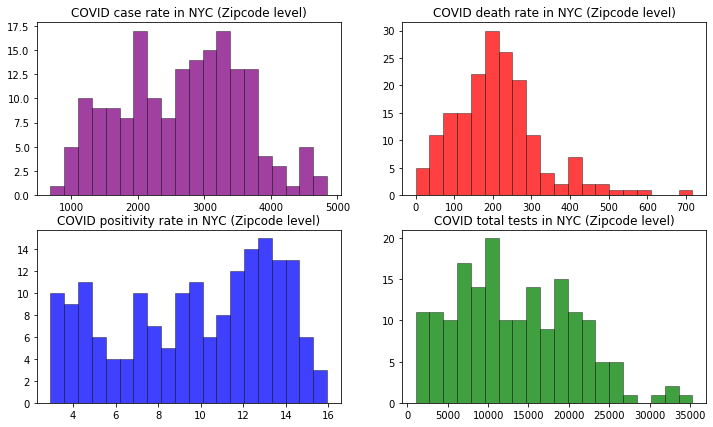

In [29]:
plt.figure(figsize=(12,7))

plt.subplot(2,2,1)
df['COVID_CASE_RATE'].hist(bins = 20, color = 'Purple', edgecolor = 'k', linewidth = 0.5, alpha = 0.75)
plt.title('COVID case rate in NYC (Zipcode level)')
plt.grid(b = False)

plt.subplot(2,2,2)
df['COVID_DEATH_RATE'].hist(bins = 20, color = 'Red', edgecolor = 'k', linewidth = 0.5, alpha = 0.75)
plt.title('COVID death rate in NYC (Zipcode level)')
plt.grid(b = False)

plt.subplot(2,2,3)
df['PERCENT_POSITIVE'].hist(bins = 20, color = 'Blue', edgecolor = 'k', linewidth = 0.5, alpha = 0.75)
plt.title('COVID positivity rate in NYC (Zipcode level)')
plt.grid(b = False)

plt.subplot(2,2,4)
df['TOTAL_COVID_TESTS'].hist(bins = 20, color = 'Green', edgecolor = 'k', linewidth = 0.5, alpha = 0.75)
plt.title('COVID total tests in NYC (Zipcode level)')
plt.grid(b = False)

# 4. Scatter plot
* Syntax:

        plt.scatter(DATAFRAME['COLUMN1'],DATAFRAME['COLUMN2'])

In [33]:
plt.figure(6,4)

plt.scatter(df['TOTAL_COVID_TESTS'], df['COVID_CASE_RATE'])

TypeError: from_bounds() argument after * must be an iterable, not int

# 5. Correlation plots (scatter matrix plots) and correlation test

Compute pairwise correlation of columns, excluding NA/null values

Method of correlation
* pearson : standard correlation coefficient (Default)
* kendall : Kendall Tau correlation coefficient
* spearman : Spearman rank correlation


In [ ]:
from pandas.plotting import scatter_matrix

# 6. Heatmap

In [ ]:
import seaborn as sns # useful data viz package with Matplotlib

# 7. Line plot (be applicable to timeseries)
* X-axis is based on the index of the dataframe

# 8. Bar charts (using groupby)
* Basic syntax to plot a bar chart is
        
        plt.bar(keys, values)